다음 링크의 'kaggle 타이타닉 시작하기' 내용 연습<br>
http://writeren.tistory.com/68?category=757132

# 데이터 기본 분석

In [10]:
import pandas as pd
%matplotlib inline

In [11]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
#print("train : ", train.shape, " ", " test : ", test.shape)
train.head()
test.head()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## 입력 데이터 :

- **PassengerId** : 승객 번호<br>
- **Survived** : 생존여부(1: 생존, 0 : 사망)<br>
- **Pclass** : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)<br>
- **Name** : 승객 이름<br>
- **Sex** : 승객 성별 (male/female)<br>
- **Age** : 승객 나이(float) <br>
- **SibSp** : 동반한 형제자매, 배우자 수<br>
- **Parch** : 동반한 부모, 자식 수<br>
- **Ticket** : 티켓의 고유 넘버(문자열)<br>
- **Fare** 티켓의 요금(float)<br>
- **Cabin** : 객실 번호<br>
- **Embarked** : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)<br>


In [12]:
train.info()

print("")
for i in range(train.shape[1]):
    print(i, ":", train.columns[i])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

0 : PassengerId
1 : Survived
2 : Pclass
3 : Name
4 : Sex
5 : Age
6 : SibSp
7 : Parch
8 : Ticket
9 : Fare
10 : Cabin
11 : Embarked


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

먼저 비어있는(null) 데이터를 처리해야 한다.
데이터가 누락된 항목을 확인해서, 너무 많이 빠진 항목이면 제거하고, 중요한 항목이거나 너무 많이 빠져 있지 않으면 데이터를 채워 넣도록 한다.

**Age** : null이 많고 나이가 중요할 것으로 판단되니 데이터를 채워야 할 필요가 있다.<br>
**Cabin** : null이 너무 많다.<br>
**Embarked** : null이 거의 없으므로 중요하지 않은 값으로 채워도 문제가 없어 보임<br>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # 스타일/폰트 등의 속성 설정. 기본값으로 설정한다.

In [15]:
def bar_chart(feature):
    '''
    특정 feature를 'Survived' 값에 따라 분류해서 chart로 보여준다.
    
    functions :
        value_counts():Return a Series containing counts of unique values.
            내림차순으로 정렬된 feature의 데이터 타입당 갯수들의 배열을 리턴한다.
                        
    '''   
     
    survived = train[train['Survived'] == 1][feature].value_counts() # 생존자('Survived' == 1) 중 feature에 해당하는 사람들의 수
    dead = train[train['Survived'] == 0][feature].value_counts() # 사망자('Survived' == 0) 중 feature에 해당하는 사람들의 수
    print("survived:\n", survived)
    print("\ndead:\n", dead)
    
    #print("survived:", survived.shape)
    df = pd.DataFrame([survived, dead])
    print("\ndf:\n", df)
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5)) #figsize(w, h) 차트의 width/height

survived:
 female    233
male      109
Name: Sex, dtype: int64

dead:
 male      468
female     81
Name: Sex, dtype: int64

df:
      female  male
Sex     233   109
Sex      81   468


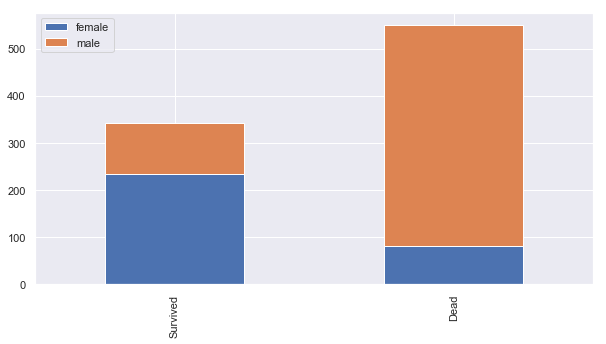

In [16]:
bar_chart('Sex')

Pclass에 따른 생존률을 계산해 본다.<br>
Survived가 1은 생존, 0은 사망이므로 Pclass에 따라 그룹을 지어서 평균을 내면 Pclass에 따른 상대적인 생존률을 비교할 수 있을 것이다.

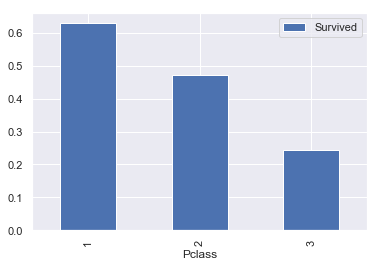

In [17]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot.bar()

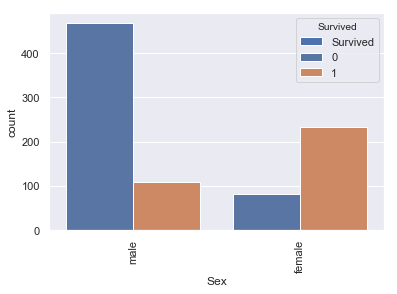

In [18]:
train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False).plot.bar()
sns.countplot('Sex', hue='Survived', data=train)

Age에 대해 그래프를 그래서 분석을 해 본다.<br>
아래 sns.kdeplot에 대해서는 판별이 어렵다. 이게 무엇을 뜻하는지...?

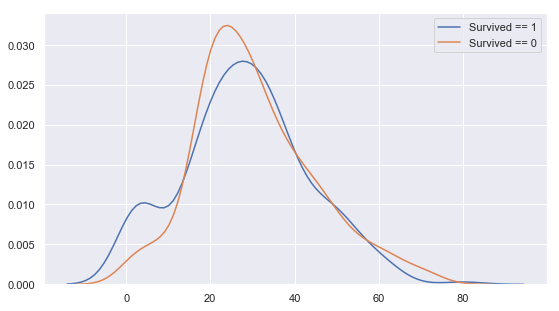

In [28]:
df = train[train['Age'].isnull() == False] # age는 nan이 많으므로 일단 걸러 내야 한다.
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df[df['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

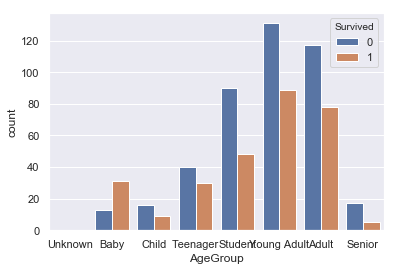

In [27]:
import numpy as np
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
# cut : value를 bins에 지정된 범위로 변환한다.(18.0, 24.0]와 같이 표현된다. labels를 지정하면 해당 범위에 명시된 label로 값이 변경된다.
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
sns.countplot('AgeGroup', hue='Survived', data=train)

survived:
 1    136
3    119
2     87
Name: Pclass, dtype: int64

dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64

df:
           1   2    3
Pclass  136  87  119
Pclass   80  97  372


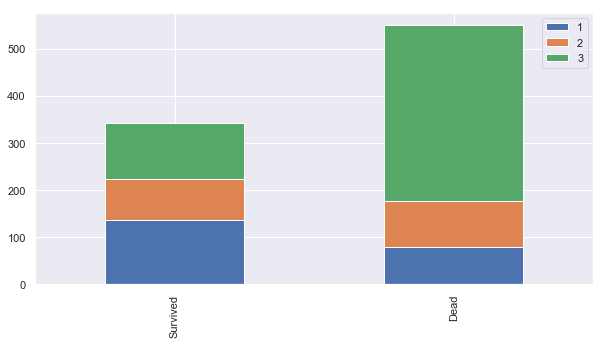

In [50]:
bar_chart("Pclass")

survived:
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64

df:
            0      1     2     3     4    5    8
SibSp  210.0  112.0  13.0   4.0   3.0  NaN  NaN
SibSp  398.0   97.0  15.0  12.0  15.0  5.0  7.0


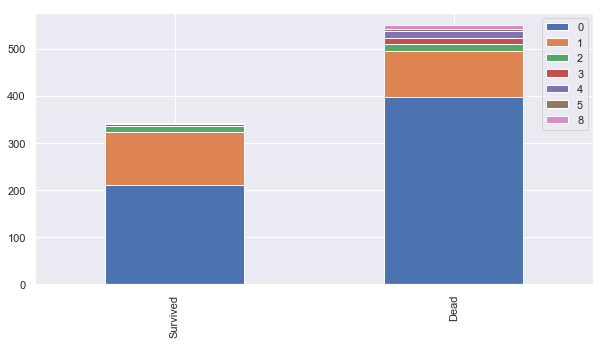

In [51]:
bar_chart('SibSp') #형제의 수

survived:
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64

df:
            0     1     2    3    4    5    6
Parch  233.0  65.0  40.0  3.0  NaN  1.0  NaN
Parch  445.0  53.0  40.0  2.0  4.0  4.0  1.0


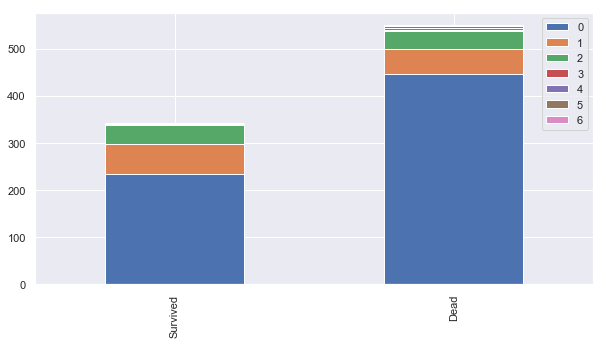

In [52]:
bar_chart('Parch') # 딸린 가족 수

survived:
 S    217
C     93
Q     30
Name: Embarked, dtype: int64

dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64

df:
             S   C   Q
Embarked  217  93  30
Embarked  427  75  47


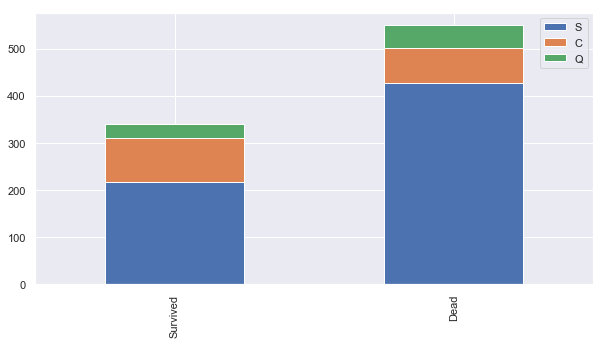

In [53]:
bar_chart("Embarked")

In [54]:
train.describe(include="all") # all : 모든 column을 포함해서 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dick, Mrs. Albert Adrian (Vera Gillespie)",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 데이터의 특성을 확인한다.
- age는 null 데이터가 177개 있다. (꽤 많음)
- cabin은 null이 687이다.
- 숫자가 아닌 데이터는 Name, Sex, Ticket, Cabin, Embarked임

## 일반적으로 다음과 같이 데이터를 가공한다.

- 불필요한 데이터는 제거한다.
- 숫자가 아닌 항목은 숫자로 변경한다.
- Null 데이터를 채워 넣는다.
- 데이터를 normalization한다.(Age)
 - normalization :  데이터를 0~1사이로 변환
 
## 여기서는 다음과 같이 한다.
- Cabin, Ticket 삭제 (Cabin은 값이 중구난방에 거의다 NULL, Ticket도 현재로서는 가공이 어렵다
 - Ticket에서 객실 위치정보를 뽑을 수 있을수도 있지만, Pclass와 많이 겹칠수도...
 - 

 Survived<br>
 Pclass<br>
 Name : 숫자로 변경?<br>
 Sex<br>
 Age : NULL 제거하고 Normalization<br>
 SibSp<br>
 Parch<br>
 ~~Ticket~~<br>
 Fare : Normalization<br>
 ~~Cabin~~<br>
 Embarked : 숫자로 변경<br>


In [55]:
# Cabin, Ticket 항목은 제거한다.(너무 많은 항목이 비어있고, 상관관계가 미약한 것으로 추정됨)
train = train.drop(['Cabin'], axis=1) # axis=0 or index : 인덱스를 찾아 삭제, axis=1 or columns : 전체 데이터에서 지정된 column을 제거.
test = test.drop(['Cabin'], axis=1)
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)


In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [57]:
s = train[train["Embarked"] == "S"].shape[0]
c = train[train["Embarked"] == "C"].shape[0]
q = train[train["Embarked"] == "Q"].shape[0]
print(s, c, q)
train["Embarked"].value_counts().index[0] # 가장 많은 값을 얻는 방법

644 168 77


'S'

In [58]:
# 가장 많이 있는 값으로 채운다.
most_embarked_label = train["Embarked"].value_counts().index[0]
train = train.fillna({"Embarked" : most_embarked_label}) #비어있는 Embarked 항목은 그냥 "S"로 채운다.
# 그냥 위 describe()로 얻은 표에서 Embarked의 top이 S이므로 바로 판단해서 적용해도 무방하다.

머신러닝을 하려면 숫자값으로 변경해야 한다.

In [59]:
'''
머신 러닝에는 숫자값이 들어가야 하므로 알파벳으로 되어 있는 Embarked 항목을 숫자로 변경한다.
'''
embarked_mapping = pd.Series([1,2,3], ['S', 'C', 'Q'])
embarked_mapping
# 아래 코드도 동일한 동작을 한다.
'''
embarked_mapping = {"S" : 1, "C" : 2, "Q" : 3} #mapping 생성
embarked_mapping
'''

'\nembarked_mapping = {"S" : 1, "C" : 2, "Q" : 3} #mapping 생성\nembarked_mapping\n'

In [60]:
# mapping의 index값에 일치하는 value를 mapping의 value값으로 변경
train["Embarked"] = train["Embarked"].map(embarked_mapping)
test["Embarked"] = test["Embarked"].map(embarked_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


기존 feature를 가공해서 새 feature를 추가할 수 있다.

In [61]:
'''
Name에서 호칭(Title)을 추출해서 새 항목(Title)을 추가한다.
Name에서 새로운 feature을 만들어 내는 것임.
'''
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)    

'''
crosstab : 두 개 이상의 factor에 대한 간단한 교차분석 표를 생성한다. 
    values와 aggregation function이 제공되지 않는 한 기본적으로 factor의 빈도를 기본으로 생성
'''
pd.crosstab(train['Title'], train['Sex'])
#pd.crosstab(train['Title'], train['Survived'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [62]:
#train['Title'].value_counts()
train['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Col', 'Major', 'Mlle',
       'Lady', 'Ms', 'Sir', 'Mme', 'Countess', 'Jonkheer', 'Don', 'Capt'],
      dtype='object')

In [63]:
'''
호칭들을 비슷한 것끼리 모아 정리해 본다.
'''
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace(['Mlle'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')

# 정리한 Title로 생존률을 계산해 본다.
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [64]:
pd.crosstab(train['Title'], train['Survived']) # 앞이 데이터, 뒤가 column.

Survived,0,1
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Rare,15,6
Royal,0,2


In [65]:
title_mapping = {"Mr" : 1, "Miss" : 2, "Mrs":3, "Master":4, "Royal":5, "Rare":6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,1


In [66]:
#Name과 PassengerId 삭제
train = train.drop(['Name', 'PassengerId'], axis=1)
test_passenger_id = test['PassengerId'] # 이건 나중에 쓸데가 있어서 백업해두어야 한다.
test = test.drop(['Name', 'PassengerId'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,1,1
1,1,1,female,38.0,1,0,71.2833,2,3
2,1,3,female,26.0,0,0,7.9250,1,2
3,1,1,female,35.0,1,0,53.1000,1,3
4,0,3,male,35.0,0,0,8.0500,1,1


In [67]:
# Sex도 숫자로 변경
sex_mapping = {"male":0, "female":1}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,1


In [68]:
# Age 값 가공
import numpy as np
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
# cut : value를 bins에 지정된 범위로 변환한다.(18.0, 24.0]와 같이 표현된다. labels를 지정하면 해당 범위에 명시된 label로 값이 변경된다.
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


survived:
 Young Adult    89
Adult          78
Unknown        52
Student        48
Baby           31
Teenager       30
Child           9
Senior          5
Name: AgeGroup, dtype: int64

dead:
 Young Adult    131
Unknown        125
Adult          117
Student         90
Teenager        40
Senior          17
Child           16
Baby            13
Name: AgeGroup, dtype: int64

df:
           Adult  Baby  Child  Senior  Student  Teenager  Unknown  Young Adult
AgeGroup     78    31      9       5       48        30       52           89
AgeGroup    117    13     16      17       90        40      125          131


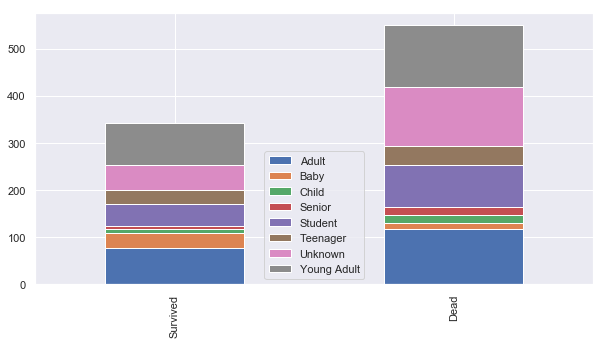

In [69]:
bar_chart('AgeGroup')

비어있는 Age를 추정해서 넣는 코드 부분<br>
아래 내용을 잘 검토해 볼 것.

In [70]:
#title_mapping = {"Mr" : 1, "Miss" : 2, "Mrs":3, "Master":4, "Royal":5, "Rare":6}
age_title_mapping = {1:"Young Adult", 2:"Student", 3:"Adult", 4:"Baby", 5:"Adult", 6:"Adult"}
print(train['Title'].value_counts().index)

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

train.head()

Int64Index([1, 2, 3, 4, 6, 5], dtype='int64')


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


In [71]:
#AgeGroup을 숫자로 변경하고, Age는 삭제한다.
age_mapping = {'Baby':1, 'Child':2, 'Teenager':3, 'Student':4, 'Young Adult':5, 'Adult':6, 'Senior':7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,1,0,7.2500,1,1,4
1,1,1,1,1,0,71.2833,2,3,6
2,1,3,1,0,0,7.9250,1,2,5
3,1,1,1,1,0,53.1000,1,3,5
4,0,3,0,0,0,8.0500,1,1,5


In [72]:
#Fare(요금) 값 조정
# qcut : Quantile-based discretization function. 변수를 순위나, 표본 분위수에 따라 균등 크기로 분류한다.
# Fare값의 범위에 따라 4개 등분으로 나뉘어지는데 각각 등분마다 포함된 사람 수는 동일하게 나눠진다.
train['FareBand'] = pd.qcut(train['Fare'], 4, labels=[1,2,3,4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels=[1,2,3,4])

train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,0,3,0,1,0,1,1,4,1
1,1,1,1,1,0,2,3,6,4
2,1,3,1,0,0,1,2,5,2
3,1,1,1,1,0,1,3,5,4
4,0,3,0,0,0,1,1,5,2


In [73]:
train['FareBand'].value_counts() # 각각 그룹마다 수가 균일하게 나눠짐을 알 수 있다.

2    224
1    223
4    222
3    222
Name: FareBand, dtype: int64

train 데이터를 input(train_X)과 output(train_Y)로 나누어 준다.

In [74]:
'''
DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
labels : single label or list-like
    Index or column labels to drop.

axis : {0 or ‘index’, 1 or ‘columns’}, default 0
    Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

index, columns : single label or list-like
    Alternative to specifying axis (labels, axis=1 is equivalent to columns=labels).
'''

train_X = train.drop('Survived', axis=1)
train_Y = train['Survived'].astype('float32')

# test_X = test.drop('Survived', axis=1)
# test_Y = test['Survived']

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
AgeGroup    891 non-null int64
FareBand    891 non-null category
dtypes: category(1), int64(8)
memory usage: 56.8 KB


In [76]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,0,3,0,1,0,1,1,4,1
1,1,1,1,1,0,2,3,6,4
2,1,3,1,0,0,1,2,5,2
3,1,1,1,1,0,1,3,5,4
4,0,3,0,0,0,1,1,5,2


In [77]:
from sklearn.preprocessing import MinMaxScaler

class NoColumnError(Exception):
    """Raised when no column in dataframe"""
    def __init__(self, value):
        self.value = value
    # __str__ is to print() the value
    def __str__(self):
        return(repr(self.value))

# normalize AgeGroup
def normalize_column(data, columnName):
    scaler = MinMaxScaler()    
    if columnName in data:
        aaa = scaler.fit_transform(data[columnName].values.reshape(-1, 1)) # 입력을 2D 데이터로 넣어야 하므로 reshape해 준다.
        aaa = aaa.reshape(-1,) # 다시 원복해서 넣어주지만, 그냥 넣어도 알아서 제대로 들어간다...
        #print(aaa.shape)
        data[columnName] = aaa
        return data
    else:
        raise NoColumnError(str(columnName) + " is not exists!")

def normalize(dataset):
    dataset = normalize_column(dataset, "AgeGroup")
    dataset = normalize_column(dataset, "Pclass")
    dataset = normalize_column(dataset, "Embarked")
    dataset = normalize_column(dataset, "Title")
    dataset = normalize_column(dataset, "SibSp")
    dataset["FareBand"] = dataset["FareBand"].astype('float')
    dataset = normalize_column(dataset, "FareBand")
    dataset = normalize_column(dataset, "FareBand")
    dataset = normalize_column(dataset, "Parch")

normalize(train)
normalize(test)


print(test)



     Pclass  Sex  SibSp     Parch  Embarked  Title  AgeGroup  FareBand
0       1.0    0  0.000  0.000000       1.0    0.0  0.666667  0.000000
1       1.0    1  0.125  0.000000       0.0    0.4  0.833333  0.000000
2       0.5    0  0.000  0.000000       1.0    0.0  1.000000  0.333333
3       1.0    0  0.000  0.000000       0.0    0.0  0.666667  0.333333
4       1.0    1  0.125  0.111111       0.0    0.4  0.500000  0.333333
5       1.0    0  0.000  0.000000       0.0    0.0  0.333333  0.333333
6       1.0    1  0.000  0.000000       1.0    0.2  0.666667  0.000000
7       0.5    0  0.125  0.111111       0.0    0.0  0.666667  0.666667
8       1.0    1  0.000  0.000000       0.5    0.4  0.333333  0.000000
9       1.0    0  0.250  0.000000       0.0    0.0  0.500000  0.666667
10      1.0    0  0.000  0.000000       0.0    0.0  0.666667  0.000000
11      0.0    0  0.000  0.000000       0.0    0.0  0.833333  0.666667
12      0.0    1  0.125  0.000000       0.0    0.4  0.500000  1.000000
13    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to floa

In [78]:
train_X = train.drop('Survived', axis=1).values # Series.values는 numpy array 데이터임.
train_Y = train['Survived'].values.reshape(-1, 1)

print(train_X.shape)
print(train_Y.shape)

(891, 8)
(891, 1)


In [85]:
import tensorflow as tf

train_X = train_X.astype(np.float32)
train_Y = train_Y.astype(np.float32)
print(train_X.shape)
print(train_Y.shape)

X = tf.placeholder(tf.float32, shape=[None, train_X.shape[1]])
Y = tf.placeholder(tf.float32, shape=[None, 1])

learning_rate = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)
    
def build_neural_network(X):    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(X, 40, activation=None, kernel_initializer=initializer)
    fc = tf.nn.relu(fc)
    fc = tf.nn.dropout(fc, keep_prob=keep_prob)
    
    fc = tf.layers.dense(fc, 20, activation=None, kernel_initializer=initializer)
    fc = tf.nn.relu(fc)
    fc = tf.nn.dropout(fc, keep_prob=keep_prob)
    
    logits = tf.layers.dense(fc, 1, activation=None)    
    return logits

def get_batch(i, x, y, batch_size=32):
    end = (i + 1) * batch_size
    if end > x.shape[0]:        
        end = x.shape[0]        
    batch_x = x[i * batch_size : end]
    batch_y = y[i * batch_size : end]
    #print("get_batch:", batch_x.shape, batch_y.shape)
    return batch_x, batch_y

logits = build_neural_network(X)
print(logits)
print(train_Y.shape)
a = tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits)
cost = tf.reduce_mean(a)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
prediction = tf.nn.sigmoid(logits)
is_correct = tf.equal(tf.round(prediction), Y)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

epochs = 200
batch_size = 32
num_batch = train_X.shape[0] // batch_size
print("num_batch=", num_batch)
lr = 0.01

from sklearn.preprocessing import Binarizer
binarizer=Binarizer(0.5)


with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        avg_cost = 0
        for batch_idx in range(num_batch + 1):
            batch_x, batch_y = get_batch(batch_idx, train_X, train_Y, batch_size)
            c, _ = session.run([cost, optimizer], feed_dict={X:batch_x, Y:batch_y, learning_rate:lr, keep_prob:0.7})
            avg_cost += (c / num_batch)
            
        #print("epoch:", epoch, " cost:{:.9f}".format(avg_cost))
        
    print("accuracy:", accuracy.eval(session=session, feed_dict={X:train_X, Y:train_Y, keep_prob:1.0}))
    
    pred = session.run(prediction, feed_dict={X:test, keep_prob:1.0}) # (418,1)
    print(pred.shape)
    print("nan count:", np.count_nonzero(np.isnan(pred) == True))
    
    test_predict_result=binarizer.fit_transform(pred)
    test_predict_result=test_predict_result.astype(np.int32)
    #print(test_predict_result[:10])
    submission = pd.DataFrame({"PassengerId" : test_passenger_id, "Survived":test_predict_result.reshape(-1)})
    submission.to_csv('submission.csv', index=False)
    
    print(submission)

    

(891, 8)
(891, 1)
Tensor("dense_32/BiasAdd:0", shape=(?, 1), dtype=float32)
(891, 1)
num_batch= 27
accuracy: 0.8563412
(418, 1)
nan count: 0
     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         0
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         1
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         1
29           921         0
..           ...      